In [10]:
import scanpy as sc
import scvelo as scv
import numpy as np
import os
from anndata import AnnData as ad

Read dataset 

In [11]:
adata = scv.datasets.pbmc68k("../datasets/raw/pbmc68k.h5ad")
adata.layers["X_counts"] = adata.X.copy()

Highly variable gene selection (counts)

In [12]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="X_counts",
    subset=True,
)

np.unique(adata.layers["X_counts"].A.sum(1), return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         78.,  80.,  83.,  87.,  88.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 108.,
        109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 136., 138.], dtype=float32),
 array([  31,   88,  185,  266,  464,  739, 1032, 1477, 1907, 2414, 2900,
        3224, 3421, 3570, 3536, 3475, 3259, 2954, 2636, 2

In [13]:
# Remove cells that have less than 
adata = adata[adata.layers["X_counts"].A.sum(1)>=5]
adata.layers["X_counts"].sum(1).min()

5.0

Preprocess

In [14]:
sc.pp.log1p(adata)

In [15]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

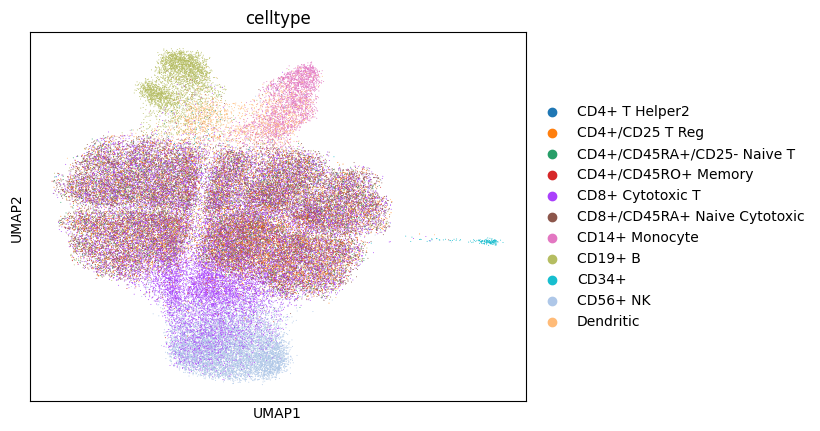

In [16]:
sc.pl.umap(adata, color=["celltype"])

Save

In [17]:
ad.write_h5ad(adata, "../datasets/processed/pbmc68k.h5ad")